In [1]:
import sys 
import sys 
from keyvars import ufiles_path
sys.path.append(ufiles_path)

import uvars
import uviz
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#[] use polars or dask

In [2]:
paths = uvars.parqts
paths

['/mnt/c/Users/Joseph/Documents/phd/datasets/TILEex/idata/sample_patches_parqt/sample_patches_parqt_9idx.parquet',
 '/mnt/c/Users/Joseph/Documents/phd/datasets/TILEex/idata/sample_patches_parqt/sample_patches_parqt_15idx.parquet',
 '/mnt/c/Users/Joseph/Documents/phd/datasets/TILEex/idata/sample_patches_parqt/sample_patches_parqt_25idx.parquet',
 '/mnt/c/Users/Joseph/Documents/phd/datasets/TILEex/idata/sample_patches_parqt/sample_patches_parqt_300idx.parquet']

In [3]:
df = pd.read_parquet(paths[0])

In [5]:
tcolx = 'tdemx'

In [6]:
var = df[tcolx].values

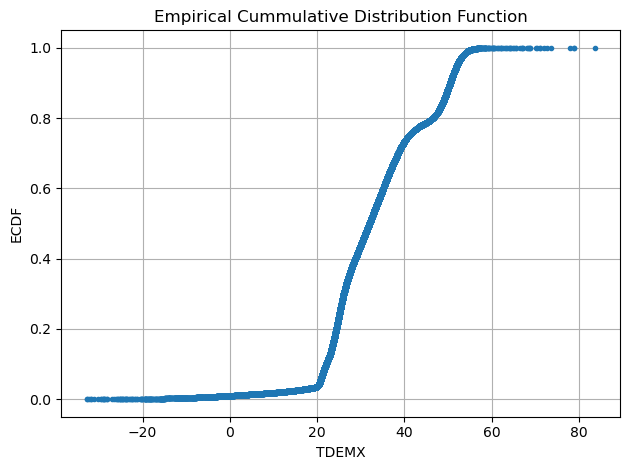

In [8]:
uviz.plot_ecdf(var, tcolx)

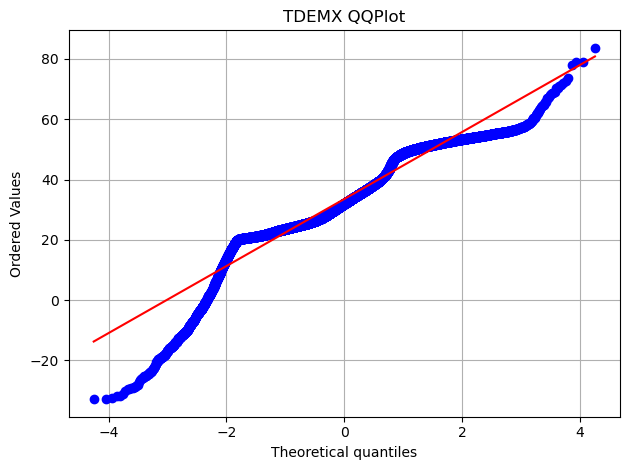

In [9]:
uviz.qqplot(var, tcolx)

Partial Least Squares: Bridging the Gap in Multivariate Analysis

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
#fcolsdf.columns
ftcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc_ffth']
fcolx = ['cop', 'edem','s1', 'tdemx','wc_ffth']
tcolx =  'pband'
d1 = df[ftcols]
X = d1.drop(tcolx, axis=1)
y = d1[tcolx].values
vif = pd.DataFrame()
vif['vname'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,vname,VIF
0,cop,750.370976
1,edem,882.581047
2,s1,27.016302
3,tdemx,56.649184
4,wc_ffth,13.885568


,vname,VIF
0,cop,750.370976
1,edem,882.581047
2,s1,27.016302
3,tdemx,56.649184
4,wc_ffth,13.885568


In [32]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Display the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.7347273  0.21466117 0.02615168 0.02265616 0.00180369]


Regularization methods like Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization) can also help mitigate multicollinearity

Yes, random forests can also help mitigate the effects of multicollinearity. Random Forest is an ensemble learning method that builds a multitude of decision trees and merges them together to get a more accurate and stable prediction. The way random forests work can make them less sensitive to multicollinearity compared to some linear models.

Here's why random forests can be less affected by multicollinearity:

Tree-based Structure: Random forests are built on the basis of decision trees. Decision trees split the data based on features that provide the best separation. This means that even if there is multicollinearity, decision trees will still find ways to separate the data into different branches.

Feature Importance: Random forests calculate feature importance based on how much each feature contributes to the reduction in impurity (e.g., Gini impurity). This allows the model to downplay the importance of highly correlated features without explicitly excluding them.

Subsetting of Features: In each tree of the random forest, only a subset of features is considered for splitting at each node. This randomization can help in reducing the impact of multicollinearity.

While random forests can be more robust to multicollinearity than some linear models, it's important to note that they might not completely eliminate the issue. It's always a good practice to preprocess your data and address multicollinearity as much as possible before applying any model, including random forests.

In [35]:
""" 
Multicollinearity is a common challenge in regression analysis that 
can affect the stability and interpretability of models. 
By understanding VIF and implementing feature selection, PCA, 
or regularization techniques, data scientists can effectively 
address multicollinearity and build more reliable regression models. 
By applying these techniques in Python, we can improve the accuracy 
and robustness of our predictions, ensuring better decision-making in 
various fields of data analysis
"""

' \nMulticollinearity is a common challenge in regression analysis that \ncan affect the stability and interpretability of models. \nBy understanding VIF and implementing feature selection, PCA, \nor regularization techniques, data scientists can effectively \naddress multicollinearity and build more reliable regression models. \nBy applying these techniques in Python, we can improve the accuracy \nand robustness of our predictions, ensuring better decision-making in \nvarious fields of data analysis\n'

In [38]:
#fcolsdf.columns
ftcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc_ffth']
fcolx = ['cop', 'edem','s1', 'tdemx','wc_ffth']
tcolx =  'pband'
d1 = df[ftcols]
X = d1.drop(tcolx, axis=1)
y = d1[tcolx].values
vif = pd.DataFrame()
vif['vname'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,vname,VIF
0,cop,750.370976
1,edem,882.581047
2,s1,27.016302
3,tdemx,56.649184
4,wc_ffth,13.885568


In [50]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif.sort_values('VIF', inplace=True, ascending=True)

    return(vif)

In [57]:
#fcolsdf.columns
ftcols = ['cop', 'edem', 'pband', 's1', 'tdemx', 'wc_ffth']
ftcols = ['edem', 's1', 'tdemx', 'wc_ffth','pband',]
fcolx = ['cop', 'edem','s1', 'tdemx','wc_ffth']

tcolx =  'pband'
d1 = df.copy()#[ftcols]
X = d1.drop(tcolx, axis=1)
y = d1[tcolx].values
vif = calc_vif(X)
vif

,variables,VIF
10,wc_sobelh,1.015041
11,wc_sobelv,1.020908
9,wc_sobelm,1.325164
7,wc_ffth,19.143071
6,wc,37.279576
4,s1,46.142048
5,tdemx,61.326708
8,wc_gau,65.445700
2,cop,782.510271
3,edem,937.046435


Fixing Multicollinearity

Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:

In [62]:
fcols = ['pband','s1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx =  'pband'
d1 = df[fcols]
X = d1.drop(tcolx, axis=1)
#y = d1[tcolx].values
vif = calc_vif(X)
vif

,variables,VIF
7,wc_sobelv,1.003046
6,wc_sobelh,1.003980
5,wc_sobelm,1.246572
1,tdemx,6.460754
3,wc_ffth,18.214236
0,s1,28.376075
2,wc,37.032200
4,wc_gau,61.633615


In [63]:
fcols = ['pband','s1', 'tdemx', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx =  'pband'
d1 = df[fcols]
X = d1.drop(tcolx, axis=1)
#y = d1[tcolx].values
vif = calc_vif(X)
vif

,variables,VIF
6,wc_sobelv,1.003043
5,wc_sobelh,1.003980
4,wc_sobelm,1.246163
1,tdemx,6.408436
3,wc_gau,12.034248
2,wc_ffth,17.439641
0,s1,28.229135


In [64]:
fcols = ['pband', 'tdemx', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx =  'pband'
d1 = df[fcols]
X = d1.drop(tcolx, axis=1)
#y = d1[tcolx].values
vif = calc_vif(X)
vif

,variables,VIF
5,wc_sobelv,1.002514
4,wc_sobelh,1.003633
3,wc_sobelm,1.242136
0,tdemx,1.980772
2,wc_gau,10.141283
1,wc_ffth,12.246207


In [65]:
fcols = ['pband', 'tdemx', 'wc_ffth',
       'wc_sobelm', 'wc_sobelh', 'wc_sobelv']
tcolx =  'pband'
d1 = df[fcols]
X = d1.drop(tcolx, axis=1)
#y = d1[tcolx].values
vif = calc_vif(X)
vif

,variables,VIF
4,wc_sobelv,1.002360
3,wc_sobelh,1.003627
2,wc_sobelm,1.232527
0,tdemx,1.891122
1,wc_ffth,2.152526


Next, combine the correlated variables into one and drop the others. This will reduce the multicollinearity.

In [66]:
df.columns

Index(['x', 'y', 'cop', 'edem', 'pband', 's1', 'tdemx', 'wc', 'wc_ffth',
       'wc_gau', 'wc_sobelm', 'wc_sobelh', 'wc_sobelv'],
      dtype='object')

To fix multicollinearity, one can remove one of the highly correlated variables, combine them into a single variable, or use a dimensionality reduction technique such as principal component analysis to reduce the number of variables while retaining most of the information.